## Kaggle Titanic

to dos:
- fam number into classification (not values but columns)
- categorize the ages in 3-4 kategories

In [143]:
# Importing the libraries
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import seaborn as sns

dataset1.head()

dataset1.columns

In [41]:
#dataset2.head()

dataset.head()
dataset.columns

dataset.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False,figsize=[22,12])
plt.show()

dataset.hist(figsize=[25,15])
plt.show()

f, ax = plt.subplots(4, 3,figsize=[22,12])
sns.violinplot(x = 'Sex', y = 'Survived', data = dataset,ax = ax[0,0])
sns.barplot(x = 'Pclass',y ='Survived',data = dataset,hue = 'Embarked',ax = ax[0,1])
sns.distplot(dataset[dataset['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])
sns.distplot(dataset[dataset['Survived']==0]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',
            ax = ax[0,2])
sns.violinplot(x = 'Sex', y = 'Fare', data = dataset,ax = ax[1,0])
sns.barplot(x ='Pclass', y = 'Fare',data = dataset , hue = 'Embarked', ax = ax[1,1])
sns.distplot(dataset[dataset['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])
sns.distplot(dataset[dataset['Survived']==0]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'red',
            ax = ax[1,2])
sns.violinplot(x = 'Sex', y ='SibSp',data = dataset,ax = ax[2,0])
sns.barplot(x= 'Pclass', y = 'SibSp', data = dataset, hue = 'Embarked', ax = ax[2,1])
sns.regplot(x = 'Fare', y = 'Age', data = dataset, ax = ax[2,2])
sns.violinplot(x = 'Sex', y = 'Parch', data = dataset, ax = ax[3,0])
sns.barplot(x = 'Pclass', y = 'Parch', data = dataset, hue = 'Embarked', ax = ax[3,1])
plt.close(12)
plt.close(13)
plt.close(14)

In [259]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0.0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1.0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0.0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1.0,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0.0,S,0


In [260]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/train.csv')
dataset1 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/test.csv')
dataset2 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv')

'''DATA PREPERATION-MANIPULATION'''
dataset['Cabin'] = dataset['Cabin'].replace(regex={r'[^NaN]': 1})
dataset1['Cabin'] = dataset1['Cabin'].replace(regex={r'[^NaN]': 1})

dataset['Fam_num'] = dataset['SibSp'] + dataset['Parch']
dataset1['Fam_num'] = dataset1['SibSp'] + dataset1['Parch']
print (dataset.values[:,12])

[1 1 0 1 0 0 0 4 2 1 2 0 0 6 0 0 5 0 1 0 0 0 0 0 4 6 0 5 0 0 0 1 0 0 1 1 0
 0 2 1 1 1 0 3 0 0 1 0 2 1 5 0 1 1 1 0 0 0 3 7 0 0 1 5 0 2 0 0 6 2 0 7 0 1
 0 0 0 0 2 0 0 0 0 0 0 3 4 0 5 0 0 0 1 3 0 0 0 1 1 1 0 0 1 0 2 0 0 0 0 1 0
 1 0 1 0 0 0 1 1 6 2 0 1 0 1 1 0 0 2 0 0 0 1 1 0 0 2 1 0 0 2 0 1 0 0 2 0 4
 2 0 0 1 0 2 0 1 0 0 0 10 1 0 0 0 5 2 1 5 0 0 0 5 2 0 0 2 4 0 0 0 10 0 6 3
 2 0 1 0 2 0 0 0 1 2 0 0 0 1 0 0 0 10 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 0 0 4 1 0 0 6 0 0 1 2 0 0 1 1 0 0 0 2 0 2 2 1 0 2 0 1 2 2 0
 0 0 1 0 6 2 0 0 0 5 1 1 0 0 0 1 1 0 1 0 0 5 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 3 0 1 0 2 0 0 0 3 0 1 1 0 0 4 2 0 2 0 1 0 2 2 0 0 0 2 10 0 0 0 2 1
 2 0 1 2 1 0 1 0 0 0 2 5 0 0 0 0 0 1 2 0 0 0 2 1 0 0 1 0 0 0 5 1 1 0 1 0 1
 0 0 0 1 1 0 0 4 1 0 2 0 0 0 2 0 1 0 0 7 0 0 0 3 0 2 1 2 0 0 0 0 0 0 0 1 1
 0 1 0 2 0 4 0 0 1 0 0 0 2 2 0 2 0 0 0 2 2 0 1 0 0 0 0 1 1 0 1 3 4 5 5 0 2
 0 1 0 0 2 1 0 3 0 3 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 1 1
 0 1 7 0 0 0 1 4 1 0 0 2 1 

In [261]:
dataset['Fam_num'] = np.where(dataset['Fam_num'].between(0,1), 1, dataset['Fam_num'])
dataset['Fam_num'] = np.where(dataset['Fam_num'].between(2,3), 2, dataset['Fam_num'])
dataset['Fam_num'] = np.where(dataset['Fam_num'].between(4,5), 3, dataset['Fam_num'])
dataset['Fam_num'] = np.where(dataset['Fam_num'].between(6,20), 4, dataset['Fam_num'])

dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(0,1), 1, dataset1['Fam_num'])
dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(2,3), 2, dataset1['Fam_num'])
dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(4,5), 3, dataset1['Fam_num'])
dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(6,20), 4, dataset1['Fam_num'])

In [262]:
print (dataset.values[:,12])

[1 1 1 1 1 1 1 3 2 1 2 1 1 4 1 1 3 1 1 1 1 1 1 1 3 4 1 3 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 1 2 1 3 1 1 1 1 1 1 1 2 4 1 1 1 3 1 2 1 1 4 2 1 4 1 1
 1 1 1 1 2 1 1 1 1 1 1 2 3 1 3 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 4 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 3
 2 1 1 1 1 2 1 1 1 1 1 4 1 1 1 1 3 2 1 3 1 1 1 3 2 1 1 2 3 1 1 1 4 1 4 2 2
 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 1 1 1 4 1 1 1 2 1 1 1 1 1 1 1 2 1 2 2 1 1 2 1 1 2 2 1 1 1
 1 1 4 2 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 3 2 1 2 1 1 1 2 2 1 1 1 2 4 1 1 1 2 1 2 1 1
 2 1 1 1 1 1 1 2 3 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 1 1 2 1 1 1 2 1 1 1 1 4 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 3 1 1 1 1 1 1 2 2 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 3 3 3 1 2 1 1 1
 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 4
 1 1 1 1 3 1 1 1 2 1 1 1 

In [263]:
# family size 0,<=2,>2

'''DATA PREPERATION-MANIPULATION'''
values = {'Sex': 1, 'Cabin': 0}
dataset = dataset.fillna(value=values)
dataset1 = dataset1.fillna(value=values)

#making traing nad test datset
#we do not need the names (take also the Survived column out)
X_train= dataset.iloc[:,[2,4,5,10,12]]#7,6
y_train= dataset.iloc[:,1:2].values
#y_train= dataset.iloc[:,1].values
print(y_train.shape)
X_test = dataset1.iloc[:,[1,3,4,9,11]]#6,5
y_test = dataset2.iloc[:,1:2].values
#y_test = dataset2.iloc[:,1].values


X_train = X_train.replace(['female','male'],[0,1]).values
X_test = X_test.replace(['female','male'],[0,1]).values


# filling the NAN values withh mean 
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(X_train[:, [2,4]])
X_train[:, [2,4]] = imputer.transform(X_train[:,[2,4]])

imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(X_test[:, [2,4]])
X_test[:, [2,4]] = imputer.transform(X_test[:,[2,4]])

#TRAIN
#[0'PassengerId',1 'Survived',2-0 'Pclass',3 'Name',4-1 'Sex',5-2 'Age',6-3 'SibSp',
#       7-4 'Parch',8 'Ticket',9 'Fare',10-5 'Cabin',11 'Embarked']

#TEST
#Index([0'PassengerId', 1-0'Pclass', 2'Name', 3-1'Sex', 4-2'Age', 5-3'SibSp', 6-4'Parch',
#       7'Ticket', 8'Fare', 9-5'Cabin', 10'Embarked'],
#       dtype='object')

# making the dummy varaible of catagorical data
# man-woman 
"""
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X_train[:,1] = labelencoder_X.fit_transform(X_train[:, 1])
onehotencoder = OneHotEncoder(categorical_features=[0])
X_train = onehotencoder.fit_transform(X_train).toarray()
X_train = X_train[:, 1:]

labelencoder_X1 = LabelEncoder()
X_test[:,1] = labelencoder_X1.fit_transform(X_test[:, 1])
onehotencoder1 = OneHotEncoder(categorical_features=[0])
X_test = onehotencoder1.fit_transform(X_test).toarray()
X_test = X_test[:, 1:]"""

# performing standard scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

(891, 1)


In [264]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0.0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1.0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0.0,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1.0,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0.0,S,1


In [265]:
np.count_nonzero(np.isnan(X_train))

0

#### Classification 

In [266]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance 
from sklearn.linear_model import LinearRegression

In [267]:
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC()
#clf_regressor = LinearRegression()
#trainnig the model
#regressor.fit(X_train, y_train)
#predicting the model on test data ste
#y_pred = regressor.predict(X_test)

In [268]:
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','LogisticRegression','SVM']
scores = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_xg, clf_lr, clf_svm]
for model in models:
    score = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [269]:
#need to get rid of 7 + need to add one hot to the Cabin info
#importing model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

#maiing object
regressor = LinearRegression()
#trainnig the model
mean_regression = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = i)
    regressor.fit(X_train[:,[0,1,2,3,4]], y_train)
    #predicting the model on test data ste
    y_pred = regressor.predict(X_test[:,[0,1,2,3,4]])
    y_pred = y_pred > 0.5
    # confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    #print(cm)
    #print(accuracy_score(y_pred, y_test))
    mean_regression.append(accuracy_score(y_pred, y_test))

In [270]:
meanscore = np.array(mean_regression).mean()
Classifiers.append('Linear Regression')
scores.append(meanscore)

In [271]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

In [272]:
mode

,score
XGBoost,0.834952
DecisionTree,0.826101
SVM,0.821557
ExtraTrees,0.820457
AdaBoost,0.818148
RandomForest,0.817111
Bagging,0.810433
LogisticRegression,0.802454
Linear Regression,0.790821


In [258]:
	score
XGBoost	0.831618
SVM	0.820458
Bagging	0.814915
DecisionTree	0.813791
AdaBoost	0.809171
RandomForest	0.807061
LogisticRegression	0.805813
ExtraTrees	0.800357
Linear Regression	0.781650

SyntaxError: invalid syntax (<ipython-input-258-ea05395e2154>, line 2)

In [ ]:
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components =  2).fit_transform(X_test)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [26]:
cm

array([[266,   0],
       [  0, 152]], dtype=int64)

In [66]:
y_train= dataset.iloc[:,1].values

In [ ]:
# performng PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

Text(0.5,1,'Support Vector Machines')

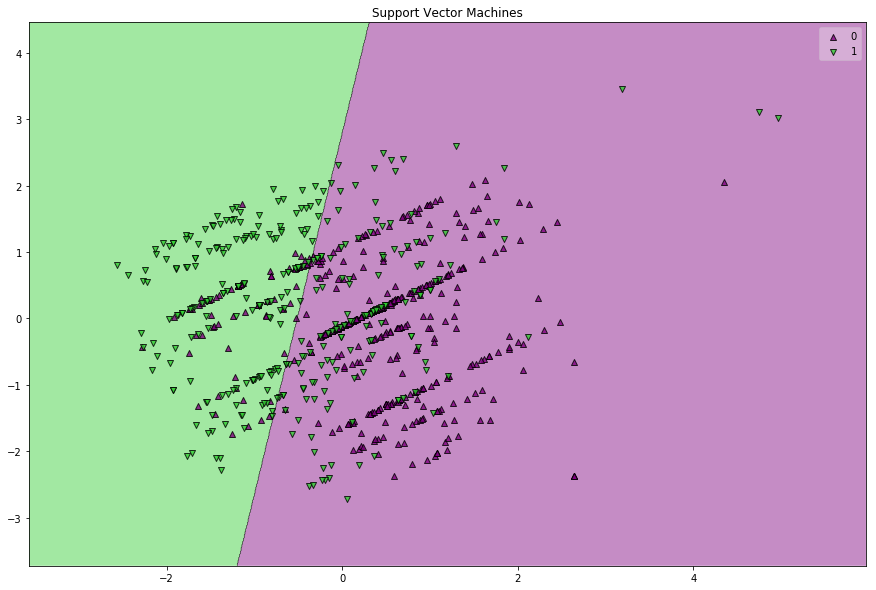

In [68]:
from mlxtend.plotting import plot_decision_regions
t = y_train.astype(np.integer)
#clf_svm = SVC(**best_params_svm)
#clf_svm.fit(X_train_reduced,t)
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_reduced, t)
y_pred = classifier.predict(X_test_reduced)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = classifier, hide_spines = False, colors = 'purple,limegreen',
                      markers = ['^','v'])
plt.title('Support Vector Machines')

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.34688995215311

In [75]:
from xgboost import XGBClassifier, plot_importance 

classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8971291866028708

## Data Dictionary
#### VariableDefinitionKey: 
- survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
- sex Sex Age Age in years sibsp # of siblings / spouses aboard the Titanic
- parch # of parents / children aboard the Titanic ticket Ticket number fare Passenger fare cabin Cabin number 
- embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes

- pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
?str.replace()



In [ ]:
#what we need
dataset.columns

In [ ]:
'''DATA MANIPULATION (TRAIN)'''
X1 = dataset.iloc[:,0]
X2 = dataset.iloc[:, 2:]
X = pd.concat([X1,X2], axis=1)
X = X.replace(['female','male'],[0,1])#.values
#y = y.replace(['NaN',],[0,1])
X['Cabin'] = X['Cabin'].replace(regex={r'[^NaN]': 1})
values = {'PassengerId': 'NoID', 'Pclass': X['Pclass'].mean(), 'Name': 'NoName', 'Sex': 1,
          'Age': X['Pclass'].mean(),  'SibSp' : X['SibSp'].mean(), 'Parch' : X['Parch'].mean(),
          'Ticket':'NoTicket', 'Fare':'NoFare', 'Cabin': 0, 'Embarked':'NoEmbarkedInfo' }
X = X.fillna(value=values)
X = X.round(1)
X[['Pclass','Sex','Age','Pclass','SibSp','Cabin']] = X[['Pclass','Sex','Age','Pclass','SibSp','Cabin']].apply(np.int64)
print ('The shape is',X.shape)
X = X[['Pclass', 'Sex', 'Age', 'SibSp', 'Cabin']].values
y = dataset.iloc[:, 1].values

In [ ]:
# Class vs Survived
print(dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
# sex vs Survived
print(dataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
# SibSp vs Survived
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)
print(dataset[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
# Parch vs Survived
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.
print(dataset[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
X

In [ ]:
import statsmodels.formula.api as sm
X = np.append(np.ones((891,1)).astype(int),X,axis=1)
X

In [ ]:
X_opt = X[:,[0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

In [ ]:
'''DATA MANIPULATION (TRAIN)'''
X_test = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/test.csv')
X_test = X_test.replace(['female','male'],[0,1])
X_test['Cabin'] = X_test['Cabin'].replace(regex={r'[^NaN]': 1})
values = {'PassengerId': 'NoID', 'Pclass': X_test['Pclass'].mean(), 'Name': 'NoName', 'Sex': 1,
          'Age': X_test['Pclass'].mean(),  'SibSp' : X_test['SibSp'].mean(), 'Parch' : X_test['Parch'].mean(),
          'Ticket':'NoTicket', 'Fare':'NoFare', 'Cabin': 0, 'Embarked':'NoEmbarkedInfo' }
X_test = X_test.fillna(value=values)
X_test = X_test.round(1)
X_test[['Sex','Age','Pclass','SibSp','Cabin']] = X_test[['Sex','Age','Pclass','SibSp','Cabin']].apply(np.int64)

In [ ]:
#['Pclass', 'Sex', 'Age', 'SibSp', 'Cabin']
X_train = X
y_train = y
X_test = X_test[['Pclass','Sex','Age','SibSp','Cabin']].values
y_test = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv').values
y_test = y_test[:,1]

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
y_pred.min()
y_pred.max()

In [ ]:
#Normalized Data
normalized = np.array((y_pred-min(y_pred))/(max(y_pred)-min(y_pred)))

In [ ]:
normalized[normalized > 0.5] = 1
normalized[normalized <= 0.5] = 0

In [ ]:
normalized

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(normalized, y_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, normalized)
cm

### Tree

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

### Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

### SVM

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)